# Looking at some JDG Data

Importage

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import os,sys,glob,numpy as np, pandas as pd

from scipy.signal import welch

Define some variables

In [2]:
pwd

'C:\\Users\\john_griffiths\\Code\\project-spicy\\notebooks'

In [3]:
f = '../data/jdg-data/testdata-mindmonitor.csv'

In [15]:
raw_chnames = np.array(['RAW_AF7', 'RAW_AF8', 'RAW_TP9', 'RAW_TP10'])

## Load the files

List the files

In [16]:
fs = glob.glob('../data/jdg-data/*.csv')

In [17]:
fs

['../data/jdg-data\\jdg-Article.csv',
 '../data/jdg-data\\jdg-Baseline1-eyesclosed.csv',
 '../data/jdg-data\\jdg-Baseline1-eyesopen.csv',
 '../data/jdg-data\\jdg-Youtube.csv',
 '../data/jdg-data\\testdata-mindmonitor.csv']

Loop over files, load files, and compute power spectra

In [18]:
dd = {}
for f in fs:
    df = pd.read_csv(f)
    dfrc = df[raw_chnames]
    dfrcnn = dfrc.dropna(axis=0)

    freqs,ps = welch(dfrcnn.T,fs=256.0)
    dfps = pd.DataFrame(ps.T, index=freqs,columns=raw_chnames)
    
    k = f.split('\\')[1].split('.')[0]
    dd[k] = {'df': df, 
             'dfrc': dfrc,
             'dfrcnn': dfrcnn,
             'dfps': dfps}
        

C:\Users\john_griffiths\Miniconda3\envs\eegnb\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\john_griffiths\Miniconda3\envs\eegnb\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\john_griffiths\Miniconda3\envs\eegnb\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
dd.keys()

dict_keys(['jdg-Article', 'jdg-Baseline1-eyesclosed', 'jdg-Baseline1-eyesopen', 'jdg-Youtube', 'testdata-mindmonitor'])

In [55]:
eo = dd['jdg-Baseline1-eyesopen']
ec = dd['jdg-Baseline1-eyesclosed']
yt = dd['jdg-Youtube']
art = dd['jdg-Article']

allps = {'eo': eo['dfps'],
         'ec': ec['dfps'],
         'yt': yt['dfps'],
         'art': art['dfps']}

dfallps = pd.concat(allps)

_df = dfallps.unstack(0)
_df = _df / _df.sum(axis=0)
_df = _df.stack(1)
_df.index = _df.index.swaplevel(0,1)
dfallps_norm = _df

## Look at power spectra

### Group by recording

#### Un-normalized

Log-log plot

<AxesSubplot:title={'center':'art'}>

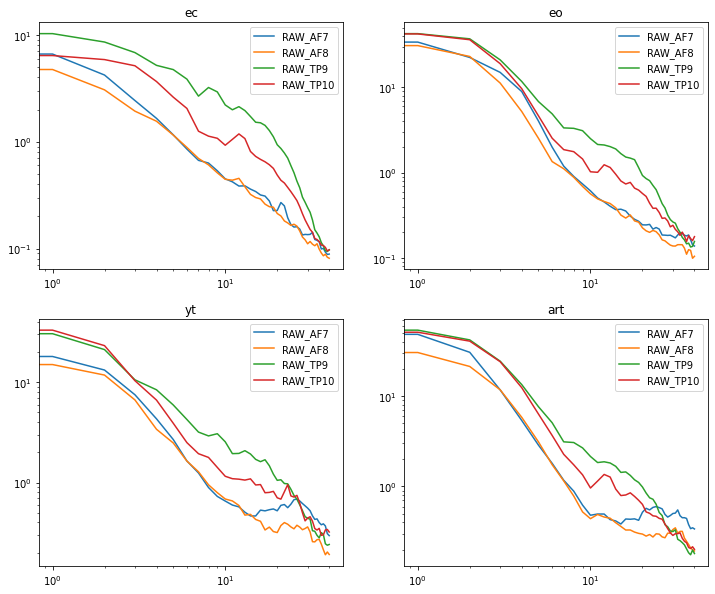

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))

a = ax[0][0]
dfallps.loc['ec'].loc[:40].plot(logx=True,logy=True,ax=a,title='ec')

a = ax[0][1]
dfallps.loc['eo'].loc[:40].plot(logx=True,logy=True,ax=a,title='eo')

a = ax[1][0]
dfallps.loc['yt'].loc[:40].plot(logx=True,logy=True,ax=a,title='yt')

a = ax[1][1]
dfallps.loc['art'].loc[:40].plot(logx=True,logy=True,ax=a,title='art')


semi log y plot

<AxesSubplot:title={'center':'art'}>

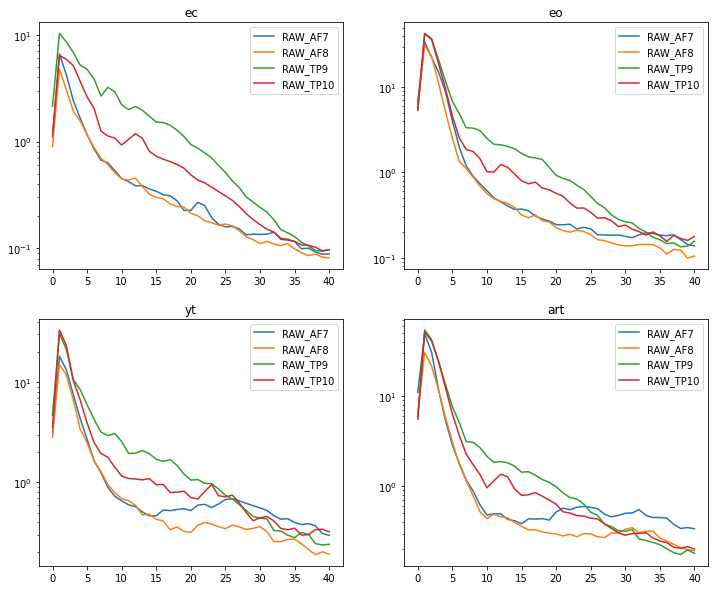

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))

a = ax[0][0]
dfallps.loc['ec'].loc[:40].plot(logx=False,logy=True,ax=a,title='ec')

a = ax[0][1]
dfallps.loc['eo'].loc[:40].plot(logx=False,logy=True,ax=a,title='eo')

a = ax[1][0]
dfallps.loc['yt'].loc[:40].plot(logx=False,logy=True,ax=a,title='yt')

a = ax[1][1]
dfallps.loc['art'].loc[:40].plot(logx=False,logy=True,ax=a,title='art')


#### Normalized

log-log plot

<AxesSubplot:title={'center':'art'}>

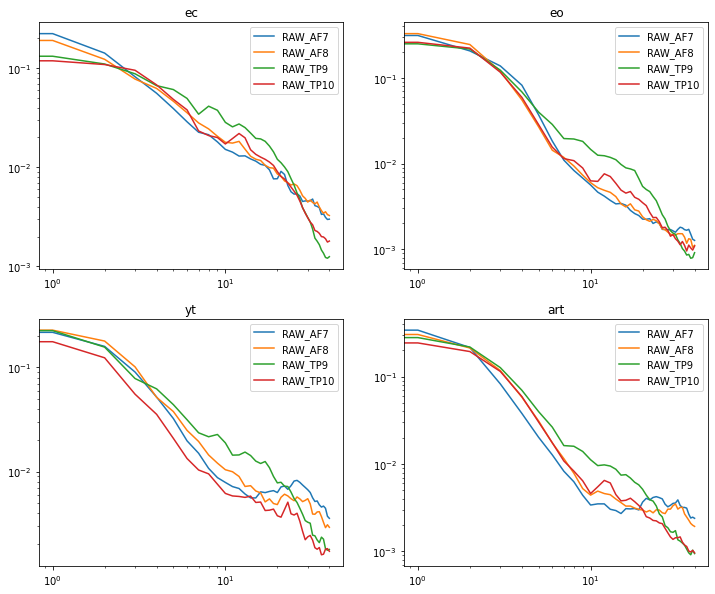

In [68]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))

a = ax[0][0]
dfallps_norm.loc['ec'].loc[:40].plot(logx=True,logy=True,ax=a,title='ec')

a = ax[0][1]
dfallps_norm.loc['eo'].loc[:40].plot(logx=True,logy=True,ax=a,title='eo')

a = ax[1][0]
dfallps_norm.loc['yt'].loc[:40].plot(logx=True,logy=True,ax=a,title='yt')

a = ax[1][1]
dfallps_norm.loc['art'].loc[:40].plot(logx=True,logy=True,ax=a,title='art')


semi log y plot

<AxesSubplot:title={'center':'art'}>

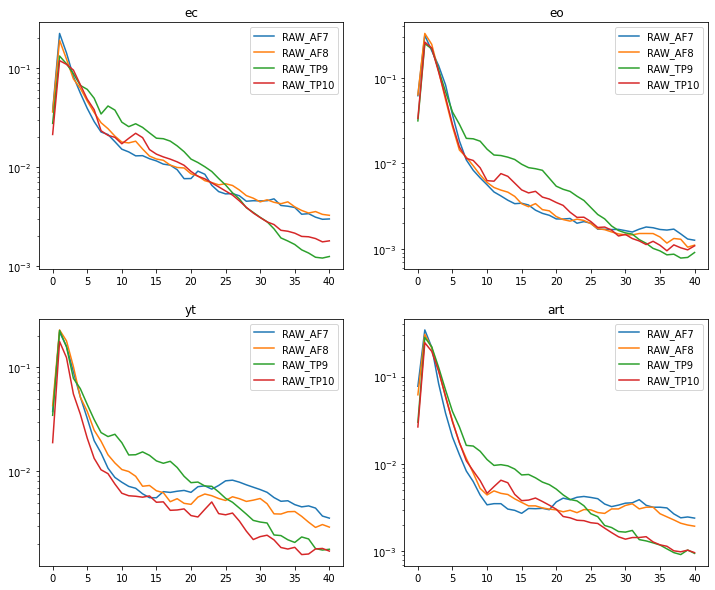

In [69]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))

a = ax[0][0]
dfallps_norm.loc['ec'].loc[:40].plot(logx=False,logy=True,ax=a,title='ec')

a = ax[0][1]
dfallps_norm.loc['eo'].loc[:40].plot(logx=False,logy=True,ax=a,title='eo')

a = ax[1][0]
dfallps_norm.loc['yt'].loc[:40].plot(logx=False,logy=True,ax=a,title='yt')

a = ax[1][1]
dfallps_norm.loc['art'].loc[:40].plot(logx=False,logy=True,ax=a,title='art')


### Group by channel

#### Unnormalized

log-log plot

<AxesSubplot:title={'center':'RAW_TP10'}>

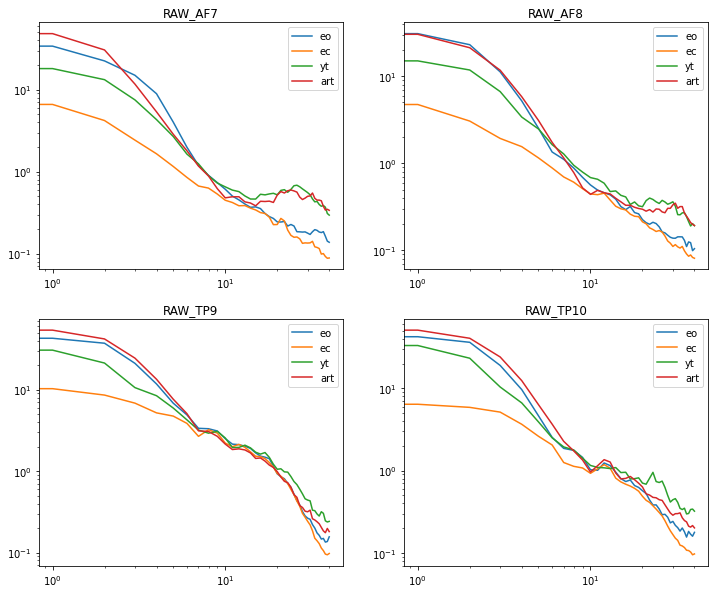

In [22]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))

a = ax[0][0]
ch = raw_chnames[0]
dfallps[ch].unstack(0).loc[:40].plot(logx=True,logy=True,ax=a,title=ch)

a = ax[0][1]
ch = raw_chnames[1]
dfallps[ch].unstack(0).loc[:40].plot(logx=True,logy=True,ax=a,title=ch)

a = ax[1][0]
ch = raw_chnames[2]
dfallps[ch].unstack(0).loc[:40].plot(logx=True,logy=True,ax=a,title=ch)

a = ax[1][1]
ch = raw_chnames[3]
dfallps[ch].unstack(0).loc[:40].plot(logx=True,logy=True,ax=a,title=ch)

Semi log y plot

<AxesSubplot:title={'center':'RAW_TP10'}>

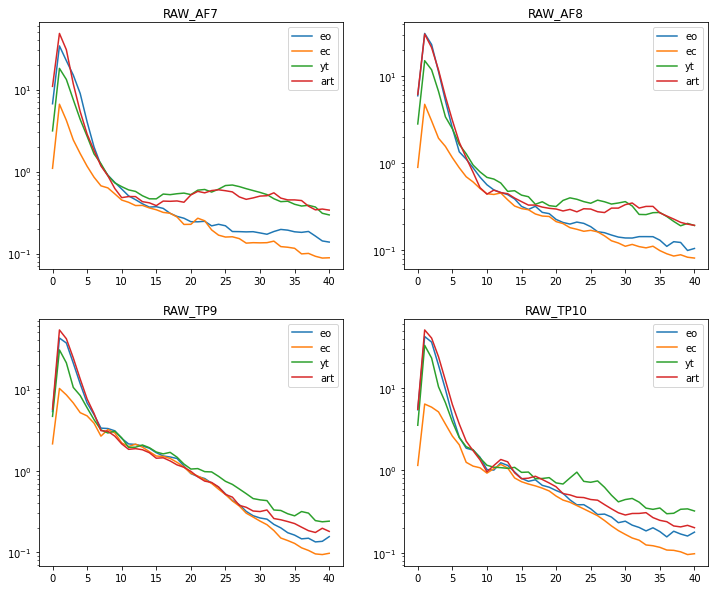

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))

a = ax[0][0]
ch = raw_chnames[0]
dfallps[ch].unstack(0).loc[:40].plot(logx=False,logy=True,ax=a,title=ch)

a = ax[0][1]
ch = raw_chnames[1]
dfallps[ch].unstack(0).loc[:40].plot(logx=False,logy=True,ax=a,title=ch)

a = ax[1][0]
ch = raw_chnames[2]
dfallps[ch].unstack(0).loc[:40].plot(logx=False,logy=True,ax=a,title=ch)

a = ax[1][1]
ch = raw_chnames[3]
dfallps[ch].unstack(0).loc[:40].plot(logx=False,logy=True,ax=a,title=ch)


#### Normalized

Log log plot

<AxesSubplot:title={'center':'RAW_TP10'}>

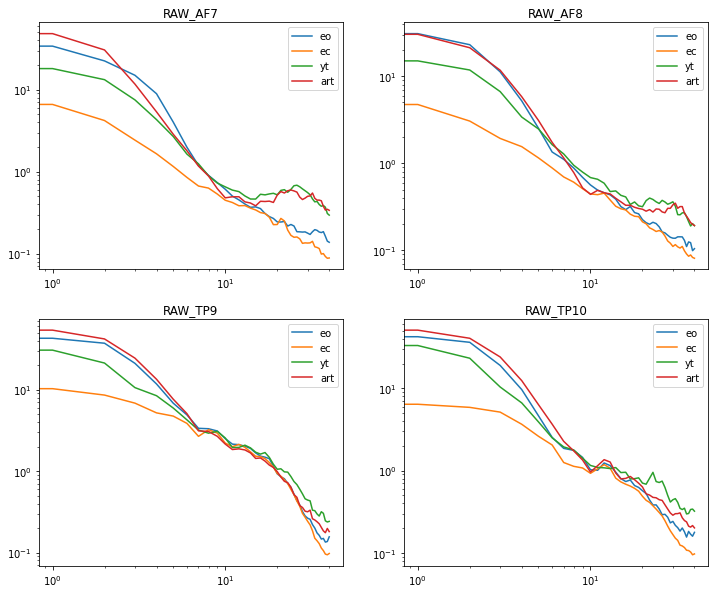

In [71]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))

a = ax[0][0]
ch = raw_chnames[0]
dfallps[ch].unstack(0).loc[:40].plot(logx=True,logy=True,ax=a,title=ch)

a = ax[0][1]
ch = raw_chnames[1]
dfallps[ch].unstack(0).loc[:40].plot(logx=True,logy=True,ax=a,title=ch)

a = ax[1][0]
ch = raw_chnames[2]
dfallps[ch].unstack(0).loc[:40].plot(logx=True,logy=True,ax=a,title=ch)

a = ax[1][1]
ch = raw_chnames[3]
dfallps[ch].unstack(0).loc[:40].plot(logx=True,logy=True,ax=a,title=ch)

Semi log y plot

<AxesSubplot:title={'center':'RAW_TP10'}>

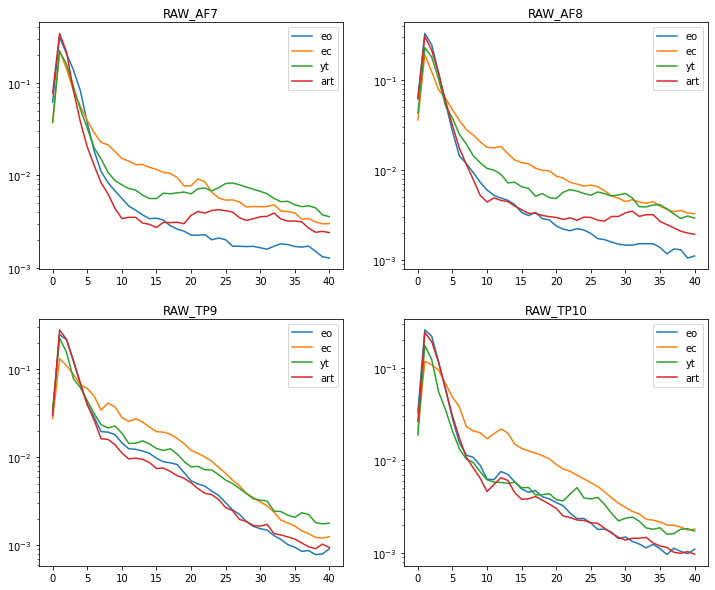

In [70]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))

a = ax[0][0]
ch = raw_chnames[0]
dfallps_norm[ch].unstack(0).loc[:40].plot(logx=False,logy=True,ax=a,title=ch)

a = ax[0][1]
ch = raw_chnames[1]
dfallps_norm[ch].unstack(0).loc[:40].plot(logx=False,logy=True,ax=a,title=ch)

a = ax[1][0]
ch = raw_chnames[2]
dfallps_norm[ch].unstack(0).loc[:40].plot(logx=False,logy=True,ax=a,title=ch)

a = ax[1][1]
ch = raw_chnames[3]
dfallps_norm[ch].unstack(0).loc[:40].plot(logx=False,logy=True,ax=a,title=ch)
